In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import seaborn as sns ## for heatmap
%matplotlib inline

Import Dataset in Python

In [6]:
mel_house=pd.read_csv(r"C:\Users\Madhul\Downloads\Melbourne_housing_FULL.csv")

In [7]:
pd.set_option('display.max_columns',0)
mel_house.head()

Suburb             Address  Rooms Type  ...  Lattitude Longtitude             Regionname Propertycount
0  Abbotsford       68 Studley St      2    h  ...   -37.8014   144.9958  Northern Metropolitan        4019.0
1  Abbotsford        85 Turner St      2    h  ...   -37.7996   144.9984  Northern Metropolitan        4019.0
2  Abbotsford     25 Bloomburg St      2    h  ...   -37.8079   144.9934  Northern Metropolitan        4019.0
3  Abbotsford  18/659 Victoria St      3    u  ...   -37.8114   145.0116  Northern Metropolitan        4019.0
4  Abbotsford        5 Charles St      3    h  ...   -37.8093   144.9944  Northern Metropolitan        4019.0

[5 rows x 21 columns]

See the structure and the summary of the dataset to understand the data.

In [8]:
mel_house.shape

(34857, 21)

In [9]:
mel_house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34857 entries, 0 to 34856
Data columns (total 21 columns):
Suburb           34857 non-null object
Address          34857 non-null object
Rooms            34857 non-null int64
Type             34857 non-null object
Price            27247 non-null float64
Method           34857 non-null object
SellerG          34857 non-null object
Date             34857 non-null object
Distance         34856 non-null float64
Postcode         34856 non-null float64
Bedroom2         26640 non-null float64
Bathroom         26631 non-null float64
Car              26129 non-null float64
Landsize         23047 non-null float64
BuildingArea     13742 non-null float64
YearBuilt        15551 non-null float64
CouncilArea      34854 non-null object
Lattitude        26881 non-null float64
Longtitude       26881 non-null float64
Regionname       34854 non-null object
Propertycount    34854 non-null float64
dtypes: float64(12), int64(1), object(8)
memory usage: 5.6+ M

In [10]:
mel_house.describe()

Rooms         Price      Distance      Postcode  ...     YearBuilt     Lattitude    Longtitude  Propertycount
count  34857.000000  2.724700e+04  34856.000000  34856.000000  ...  15551.000000  26881.000000  26881.000000   34854.000000
mean       3.031012  1.050173e+06     11.184929   3116.062859  ...   1965.289885    -37.810634    145.001851    7572.888306
std        0.969933  6.414671e+05      6.788892    109.023903  ...     37.328178      0.090279      0.120169    4428.090313
min        1.000000  8.500000e+04      0.000000   3000.000000  ...   1196.000000    -38.190430    144.423790      83.000000
25%        2.000000  6.350000e+05      6.400000   3051.000000  ...   1940.000000    -37.862950    144.933500    4385.000000
50%        3.000000  8.700000e+05     10.300000   3103.000000  ...   1970.000000    -37.807600    145.007800    6763.000000
75%        4.000000  1.295000e+06     14.000000   3156.000000  ...   2000.000000    -37.754100    145.071900   10412.000000
max       16.000000  1.120000e+07     48.100000   3978.000000  ...   2106.000000    -37.390200    145.526350   21650.000000

[8 rows x 13 columns]

Find out the number of:

    a.) Numeric attributes:

    b.) Categorical attributes:

In [11]:
num_attr = 0
cat_attr = 0
change = 0
for i in mel_house.columns:
    if mel_house[i].dtype == 'int64' or mel_house[i].dtype == 'float64' :
        num_attr += 1
        change += 1
    elif mel_house[i].dtype == 'O':
        cat_attr += 1
        change += 1

In [12]:
num = mel_house.select_dtypes(['int32', 'int64','float32', 'float64']).columns.tolist()
cat = mel_house.select_dtypes(['category', 'object']).columns.tolist()

In [13]:
print("The number of Numeric attributes: : ", num_attr)
print("The Numeric Attributes in Melbourne housing DataSet :\n", num)

The number of Numeric attributes: :  13
The Numeric Attributes in Melbourne housing DataSet :
 ['Rooms', 'Price', 'Distance', 'Postcode', 'Bedroom2', 'Bathroom', 'Car', 'Landsize', 'BuildingArea', 'YearBuilt', 'Lattitude', 'Longtitude', 'Propertycount']


In [14]:
print("The number of Categorical attributes: ", cat_attr)
print("The Categorical Attributes in Melbourne housing DataSet :\n", cat)

The number of Categorical attributes:  8
The Categorical Attributes in Melbourne housing DataSet :
 ['Suburb', 'Address', 'Type', 'Method', 'SellerG', 'Date', 'CouncilArea', 'Regionname']


Find out the number of rows present in the dataset

    · Before removing duplicate values
    · After removing duplicate values

In [15]:
print("Length of Row Before removing duplicate values : {}".format(len(mel_house)))

Length of Row Before removing duplicate values : 34857


In [16]:
mel_dup = mel_house[mel_house.duplicated()]
print("Length of Duplicated value : {}".format(len(mel_dup)))
mel_dup = mel_house.drop_duplicates()
print("Length of Row after removing duplicate values : {}".format(len(mel_dup)))

Length of Duplicated value : 1
Length of Row after removing duplicate values : 34856


For how many attributes did you need to change the data type?

In [17]:
mel_dup.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 34856 entries, 0 to 34856
Data columns (total 21 columns):
Suburb           34856 non-null object
Address          34856 non-null object
Rooms            34856 non-null int64
Type             34856 non-null object
Price            27247 non-null float64
Method           34856 non-null object
SellerG          34856 non-null object
Date             34856 non-null object
Distance         34855 non-null float64
Postcode         34855 non-null float64
Bedroom2         26639 non-null float64
Bathroom         26630 non-null float64
Car              26128 non-null float64
Landsize         23046 non-null float64
BuildingArea     13741 non-null float64
YearBuilt        15550 non-null float64
CouncilArea      34853 non-null object
Lattitude        26880 non-null float64
Longtitude       26880 non-null float64
Regionname       34853 non-null object
Propertycount    34853 non-null float64
dtypes: float64(12), int64(1), object(8)
memory usage: 5.9+ M

In [18]:
for i in mel_house.columns:
    if(mel_house[i].dtype == 'O'):
        mel_house[i] = mel_house[i].astype('category')

In [19]:
mel_dup.Date = pd.to_datetime(mel_dup.Date)
mel_dup.Date.dtype

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\generic.py:5096: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


dtype('<M8[ns]')

In [20]:
print("Number of attributes we need to change the data type : ", change)

Number of attributes we need to change the data type :  21


In [21]:
mel_dup.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 34856 entries, 0 to 34856
Data columns (total 21 columns):
Suburb           34856 non-null object
Address          34856 non-null object
Rooms            34856 non-null int64
Type             34856 non-null object
Price            27247 non-null float64
Method           34856 non-null object
SellerG          34856 non-null object
Date             34856 non-null datetime64[ns]
Distance         34855 non-null float64
Postcode         34855 non-null float64
Bedroom2         26639 non-null float64
Bathroom         26630 non-null float64
Car              26128 non-null float64
Landsize         23046 non-null float64
BuildingArea     13741 non-null float64
YearBuilt        15550 non-null float64
CouncilArea      34853 non-null object
Lattitude        26880 non-null float64
Longtitude       26880 non-null float64
Regionname       34853 non-null object
Propertycount    34853 non-null float64
dtypes: datetime64[ns](1), float64(12), int64(1), obj

Find the number of missing values and provide the value that they have been inputed with

In [23]:
mel_dup['Price'].fillna(0, inplace = True)
mel_dup['Distance'].fillna(0, inplace = True)
mel_dup['Postcode'].fillna(0, inplace = True)
mel_dup['Bedroom2'].fillna(0, inplace = True)
mel_dup['Bathroom'].fillna(0, inplace = True)
mel_dup['Car'].fillna(0, inplace = True)
mel_dup['Landsize'].fillna(121, inplace = True)
mel_dup['BuildingArea'].fillna(0, inplace = True)
mel_dup['YearBuilt'].fillna(0, inplace = True)
mel_dup['Lattitude'].fillna(-9999, inplace = True)
mel_dup['Longtitude'].fillna(-9999, inplace = True)
mel_dup['Propertycount'].fillna(0, inplace = True)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\generic.py:6130: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


In [25]:
mod = str(mel_dup.mode()['Propertycount'].values[0])
mel_dup['CouncilArea'].fillna(mod, inplace=True)


In [26]:
mod = str(mel_dup.mode()['Regionname'].values[0])
mel_dup['Regionname'].fillna(mod, inplace=True)


In [27]:
pd.isna(mel_dup).sum()

Suburb           0
Address          0
Rooms            0
Type             0
Price            0
Method           0
SellerG          0
Date             0
Distance         0
Postcode         0
Bedroom2         0
Bathroom         0
Car              0
Landsize         0
BuildingArea     0
YearBuilt        0
CouncilArea      0
Lattitude        0
Longtitude       0
Regionname       0
Propertycount    0
dtype: int64

Outlier Treatment:
    Identify the varibales : Make a subset of the dataset with all the numeric variables.

    Outliers : For each variable of this subset, carry out the outlier detection.
    Find out the percentile distribution of each variable and carry out capping and flooring for outlier values.

In [28]:
mel_dup_num = mel_dup.select_dtypes(['int32', 'int64', 'float32', 'float64'])
mel_dup_num.head()

Rooms      Price  Distance  Postcode  Bedroom2  ...  BuildingArea  YearBuilt  Lattitude  Longtitude  Propertycount
0      2        0.0       2.5    3067.0       2.0  ...           0.0        0.0   -37.8014    144.9958         4019.0
1      2  1480000.0       2.5    3067.0       2.0  ...           0.0        0.0   -37.7996    144.9984         4019.0
2      2  1035000.0       2.5    3067.0       2.0  ...          79.0     1900.0   -37.8079    144.9934         4019.0
3      3        0.0       2.5    3067.0       3.0  ...           0.0        0.0   -37.8114    145.0116         4019.0
4      3  1465000.0       2.5    3067.0       3.0  ...         150.0     1900.0   -37.8093    144.9944         4019.0

[5 rows x 13 columns]

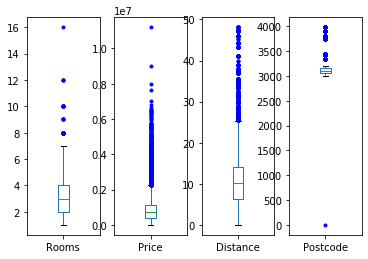

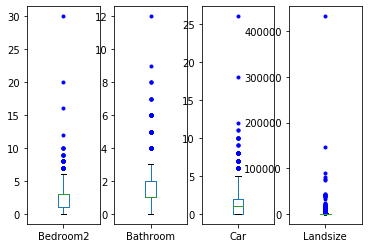

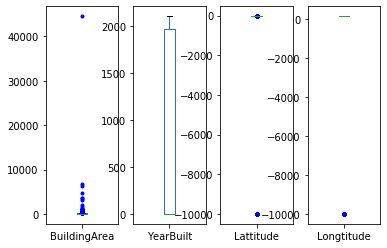

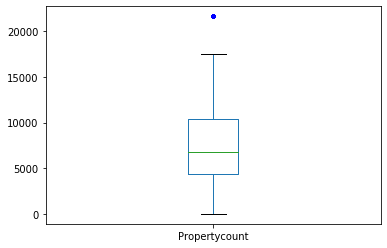

In [29]:
df_1 = mel_dup_num.iloc[:, 1:-1]
rows = 4
column = 0
value = 4
col= 0

for i in range(rows):
    col = column + value
    mel_dup_num.iloc[:, column:col].plot(kind = 'box', subplots=True, sym='b.')
    column = column + value

plt.show()

In [36]:
def IQR_outliers(value):
   
    df = mel_dup[value]
    Q1=df.quantile(0.25)
    Q3=df.quantile(0.75)
    IQR = Q3-Q1
    Floor= Q1 - 1.5*IQR
    Cap=Q3 + 1.5*IQR
    
    outliers = df[(df <= Floor) & (df >= Cap)].tolist()
    return Floor, Cap, len(outliers), outliers

out =  pd.DataFrame(columns=['parameters'])
out.parameters = ["Floor", "Cap", "no_of_outliers","outliers"]
out.set_index('parameters', inplace=True)
for i in mel_dup_num: 
    Floor, Cap, no_of_outliers,outliers = IQR_outliers(i)
    out[i] = [Floor,Cap,no_of_outliers,outliers]
    
out

Rooms      Price Distance Postcode Bedroom2  ... BuildingArea YearBuilt Lattitude Longtitude Propertycount
parameters                                                  ...                                                          
Floor             -1    -725000       -5   2893.5       -2  ...       -175.5   -2947.5  -38.3078    144.238       -4655.5
Cap                7  2.275e+06     25.4   3313.5        6  ...        292.5    4912.5  -37.4488     145.54       19452.5
no_of_outliers     0          0        0        0        0  ...            0         0         0          0             0
outliers          []         []       []       []       []  ...           []        []        []         []            []

[4 rows x 13 columns]

Feature Transformation:
    Identify variables that have non-linear trends.
    How many variables have non-linear trends?
    Transform them (as required)


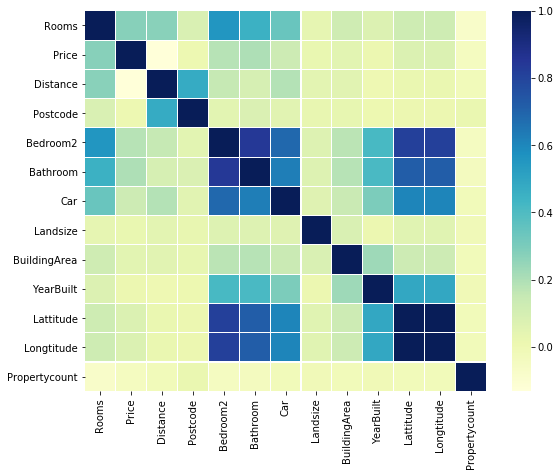

In [38]:
corr = mel_dup.corr()
f, ax = plt.subplots(figsize=(9,7))
sns.heatmap(corr, ax = ax, cmap ="YlGnBu", linewidths = 0.1)

Standardization:
    
Name the variables to be standardised before using a distance-based algorithm

In [42]:
from sklearn import preprocessing
scaler = preprocessing.StandardScaler()
scaler_obj = scaler.fit_transform(mel_dup_num)
scaler_obj = pd.DataFrame(scaler_obj, columns=mel_dup_num.columns)
scaler_obj.head()

Rooms     Price  Distance  Postcode  Bedroom2  ...  BuildingArea  YearBuilt  Lattitude  Longtitude  Propertycount
0 -1.062974 -1.149702 -1.279196 -0.444029 -0.228411  ...     -0.239449  -0.897176   0.544728    0.544724      -0.802385
1 -1.062974  0.923038 -1.279196 -0.444029 -0.228411  ...     -0.239449  -0.897176   0.544728    0.544725      -0.802385
2 -1.062974  0.299816 -1.279196 -0.444029 -0.228411  ...      0.059982   1.047075   0.544726    0.544724      -0.802385
3 -0.031975 -1.149702 -1.279196 -0.444029  0.410553  ...     -0.239449  -0.897176   0.544726    0.544728      -0.802385
4 -0.031975  0.902030 -1.279196 -0.444029  0.410553  ...      0.329091   1.047075   0.544726    0.544724      -0.802385

[5 rows x 13 columns]

In [44]:
scaler_obj.describe()

Rooms         Price      Distance      Postcode  ...     YearBuilt     Lattitude    Longtitude  Propertycount
count  3.485600e+04  3.485600e+04  3.485600e+04  3.485600e+04  ...  3.485600e+04  3.485600e+04  3.485600e+04   3.485600e+04
mean   7.202760e-15 -1.064358e-15 -1.271081e-15 -4.138868e-15  ...  2.235477e-14 -3.957173e-15 -4.986744e-15   6.419663e-16
std    1.000014e+00  1.000014e+00  1.000014e+00  1.000014e+00  ...  1.000014e+00  1.000014e+00  1.000014e+00   1.000014e+00
min   -2.093973e+00 -1.149702e+00 -1.647437e+00 -2.825191e+01  ... -8.971760e-01 -1.835786e+00 -1.835786e+00  -1.709929e+00
25%   -1.062974e+00 -5.895017e-01 -7.047389e-01 -5.890977e-01  ... -8.971760e-01  5.446840e-01  5.446611e-01  -7.197376e-01
50%   -3.197470e-02 -1.273369e-01 -1.302820e-01 -1.176239e-01  ... -8.971760e-01  5.447184e-01  5.447193e-01  -1.827533e-01
75%    9.990244e-01  4.608730e-01  4.147155e-01  3.629166e-01  ...  1.113589e+00  5.447353e-01  5.447375e-01   6.412398e-01
max    1.337101e+01  1.453589e+01  5.437530e+00  7.815829e+00  ...  1.257873e+00  5.448263e-01  5.448489e-01   3.178931e+00

[8 rows x 13 columns]

Dummy encoding :
    
Identify the number of dummy variables to be created for the variable Method.

In [46]:
dummy=pd.get_dummies(mel_dup['Method'])
dummy

PI  PN  S  SA  SN  SP  SS  VB  W
0       0   0  0   0   0   0   1   0  0
1       0   0  1   0   0   0   0   0  0
2       0   0  1   0   0   0   0   0  0
3       0   0  0   0   0   0   0   1  0
4       0   0  0   0   0   1   0   0  0
5       1   0  0   0   0   0   0   0  0
6       0   0  0   0   0   0   0   1  0
7       0   0  0   0   1   0   0   0  0
8       0   0  1   0   0   0   0   0  0
9       0   0  1   0   0   0   0   0  0
10      0   0  1   0   0   0   0   0  0
11      0   0  1   0   0   0   0   0  0
12      1   0  0   0   0   0   0   0  0
13      0   0  0   0   0   0   0   0  1
14      0   0  1   0   0   0   0   0  0
15      0   0  1   0   0   0   0   0  0
16      0   0  1   0   0   0   0   0  0
17      0   0  1   0   0   0   0   0  0
18      0   0  1   0   0   0   0   0  0
19      0   0  1   0   0   0   0   0  0
20      0   0  0   0   0   1   0   0  0
21      0   0  0   0   0   1   0   0  0
22      0   0  0   0   0   1   0   0  0
23      0   0  0   0   0   0   0   1  0
24      0   0  0   0   0   0   0   1  0
25      0   0  1   0   0   0   0   0  0
26      0   0  1   0   0   0   0   0  0
27      0   0  1   0   0   0   0   0  0
28      0   0  1   0   0   0   0   0  0
29      0   0  0   0   0   1   0   0  0
...    ..  .. ..  ..  ..  ..  ..  .. ..
34827   0   0  1   0   0   0   0   0  0
34828   1   0  0   0   0   0   0   0  0
34829   0   0  1   0   0   0   0   0  0
34830   0   0  1   0   0   0   0   0  0
34831   0   0  1   0   0   0   0   0  0
34832   0   0  1   0   0   0   0   0  0
34833   0   0  1   0   0   0   0   0  0
34834   0   1  0   0   0   0   0   0  0
34835   0   0  1   0   0   0   0   0  0
34836   0   0  1   0   0   0   0   0  0
34837   0   0  1   0   0   0   0   0  0
34838   0   0  0   0   0   1   0   0  0
34839   0   0  0   0   0   1   0   0  0
34840   0   0  0   0   0   0   0   1  0
34841   0   0  0   0   0   0   0   1  0
34842   0   0  0   0   0   1   0   0  0
34843   0   0  1   0   0   0   0   0  0
34844   0   0  0   0   0   1   0   0  0
34845   0   0  0   0   0   0   0   0  1
34846   0   0  0   0   0   1   0   0  0
34847   1   0  0   0   0   0   0   0  0
34848   0   0  1   0   0   0   0   0  0
34849   0   0  0   0   0   1   0   0  0
34850   0   0  0   0   0   1   0   0  0
34851   0   0  1   0   0   0   0   0  0
34852   1   0  0   0   0   0   0   0  0
34853   0   0  0   0   0   1   0   0  0
34854   0   0  1   0   0   0   0   0  0
34855   0   0  0   0   0   1   0   0  0
34856   1   0  0   0   0   0   0   0  0

[34856 rows x 9 columns]